# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Bagus Angkasawan Sumantri Putra
- **Email:** bagusasp01@gmail.com
- **ID Dicoding:** bagusangkasawan

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca terhadap penggunaan sepeda pada hari kerja dan hari libur?
2. Kapan waktu penggunaan sepeda paling tinggi sepanjang hari, dan bagaimana pola penggunaan tersebut bervariasi sepanjang minggu?

## Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt

## Data Wrangling

### Gathering Data

**Load tabel day:**
- Data pertama yang harus dimuat ialah data dari tabel hari.
- Dibawah ini merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [29]:
day_df = pd.read_csv("https://raw.githubusercontent.com/bagusangkasawan/data-analysis/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kode di atas akan menampilkan 5 baris pertama dari DataFrame day_df seperti pada tabel di atas ini.

**Load tabel hour:**
- Data selanjutnya yang harus dimuat ialah data dari tabel jam.
- Dibawah merupakan kode untuk memuat tabel tersebut menjadi sebuah DataFrame.

In [30]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/bagusangkasawan/data-analysis/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode di atas akan menampilkan 5 baris pertama dari DataFrame hour_df seperti pada tabel di atas ini.

**Insight:**
- Mengetahui bahwa terdapat 16 kolom pada tabel day menggunakan function head().
- Mengetahui bahwa terdapat 17 kolom pada tabel hour menggunakan function head().
- Terdapat perbedaan kolom antara tabel day dan tabel hour, dimana tabel hour memiliki kolom hr sebagai hour/jam.

### Assessing Data

**Menilai Data day_df:**
- Data pertama yang akan dinilai adalah day_df. Sebagai permulaan, kita memeriksa tipe data dan jumlah data dari tiap kolom yang terdapat dalam day_df.
- Proses ini dapat dilakukan menggunakan method info() untuk menampilkan informasi yang dibutuhkan.

In [31]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada **day_df** telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom **dteday**. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, **bukan object** (ini digunakan untuk tipe data string).

**Menilai Data hour_df:**
- Selanjutnya yang akan dinilai adalah hour_df. Sebagai permulaan, kita memeriksa tipe data dan jumlah data dari tiap kolom yang terdapat dalam hour_df.
- Proses ini dapat dilakukan menggunakan method info() untuk menampilkan informasi yang dibutuhkan.

In [32]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada **hour_df** telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom **dteday**. Kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, **bukan object** (ini digunakan untuk tipe data string).

**Insight:**
- Mengetahui bahwa pada tabel **day_df** terdapat kesalahan tipe data untuk kolom **dteday** menggunakan function info().
- Mengetahui bahwa pada tabel **hour_df** terdapat kesalahan tipe data untuk kolom **dteday** menggunakan function info().

### Cleaning Data

**Membersihkan Data day_df:**
- Selanjutnya, kita akan mengatasi permasalahan pada day_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday.
- Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.

In [33]:
column = "dteday"
day_df[column] = pd.to_datetime(day_df[column])

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Membersihkan Data hour_df:**
- Selanjutnya, kita akan mengatasi permasalahan pada hour_df. Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday.
- Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas.

In [35]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Telah berhasil membersihkan kesalahan tipe data object menjadi datetime pada tabel **day_df** di kolom **dteday** menggunakan function to_datetime() yang disediakan oleh library pandas.
- Telah berhasil membersihkan kesalahan tipe data object menjadi datetime pada tabel **hour_df** di kolom **dteday** menggunakan function to_datetime() yang disediakan oleh library pandas.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

**Menampilkan rangkuman parameter statistikdengan menggunakan function describe()**

In [37]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Menampilkan kolerasi antara cuaca dengan total pengguna dengan menggunakan function groupby()**

In [38]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                     
           nunique      sum   max  min         mean          std
weathersit                                                      
1              463  2257952  8714  431  4876.786177  1879.483989
2              247   996858  8362  605  4035.862348  1809.109918
3               21    37869  4639   22  1803.285714  1240.284449

**Menampilkan kolerasi antara cuaca, hari bekerja dan total pengguna dengan menggunakan function groupby()**

In [39]:
day_df.groupby(by=["weathersit", "workingday"]).agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                     
                      nunique      sum   max  min         mean          std
weathersit workingday                                                      
1          0              156   715614  8714  754  4587.269231  2047.547484
           1              307  1542338  8173  431  5023.902280  1773.485099
2          0               70   275578  7852  605  3936.828571  1925.475601
           1              177   721280  8362  683  4075.028249  1765.122364
3          0                5     9077  4459  627  1815.400000  1595.990226
           1               16    28792  4639   22  1799.500000  1171.221812

### Eksplorasi Data hour_df

**Menampilkan rangkuman parameter statistik dengan menggunakan function describe()**

In [40]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Menampilkan kolerasi antara jam-jam tertentu dengan total pengguna dengan menggunakan function groupby()**

In [41]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant     cnt                                 
   nunique     sum  max min        mean         std
hr                                                 
0      726   39130  283   2   53.898072   42.307910
1      724   24164  168   1   33.375691   33.538727
2      715   16352  132   1   22.869930   26.578642
3      697    8174   79   1   11.727403   13.239190
4      697    4428   28   1    6.352941    4.143818
5      717   14261   66   1   19.889819   13.200765
6      725   55132  213   1   76.044138   55.084348
7      727  154171  596   1  212.064649  161.441936
8      727  261001  839   5  359.011004  235.189285
9      727  159438  426  14  219.309491   93.703458
10     727  126257  539   8  173.668501  102.205413
11     727  151320  663  10  208.143054  127.495536
12     728  184414  776   3  253.315934  145.081134
13     729  184919  760  11  253.661180  148.107657
14     729  175652  750  12  240.949246  147.271574
15     729  183149  750   7  251.233196  144.632541
16     730  227748  783  11  311.983562  148.682618
17     730  336860  976  15  461.452055  232.656611
18     728  309772  977  23  425.510989  224.639304
19     728  226789  743  11  311.523352  161.050359
20     728  164550  567  11  226.030220  119.670164
21     728  125445  584   6  172.314560   89.788893
22     728   95612  502   9  131.335165   69.937782
23     728   63941  256   2   87.831044   50.846889

**Menambah kolom hr_group yang berisi kelompok jam berdasarkan pembagian jam menggunakan apply()**

In [42]:
hour_df["hr_group"] = hour_df.hr.apply(lambda x: "Dini Hari" if x>=0 and x<6
                                       else ("Pagi" if x>=6 and x<11
                                             else ("Siang" if x>=11 and x<15
                                                   else "Sore" if x>=15 and x<18 else "Malam")
                                            )
                                      )
hour_df.groupby(by="hr_group").instant.nunique().sort_values(ascending=False)

,instant
hr_group,
Malam,4368
Dini Hari,4276
Pagi,3633
Siang,2913
Sore,2189


**Menampilkan kolerasi antara kelompok jam-jam tertentu dengan total pengguna dengan menggunakan function groupby()**

In [43]:
hour_df.groupby(by="hr_group").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant     cnt                                 
          nunique     sum  max min        mean         std
hr_group                                                  
Dini Hari    4276  106509  283   1   24.908559   30.274492
Malam        4368  986109  977   2  225.757555  175.218285
Pagi         3633  755999  839   1  208.092210  170.351826
Siang        2913  696305  776   3  239.033642  143.378613
Sore         2189  747757  976   7  341.597533  200.415497

**Insight:**
- Pada Explorasi Data day_df terdapat hubungan yang jelas antara kondisi cuaca dan jumlah pengguna sepeda pada hari kerja maupun hari libur. Di kondisi cuaca ekstrem (kategori 4), tidak ada pengguna sepeda yang tercatat, sementara jumlah pengguna tertinggi umumnya muncul pada cuaca cerah (kategori 1) terutama saat hari kerja. Sebaliknya, kondisi cuaca sedang (kategori 3) memiliki rata-rata jumlah pengguna paling rendah.
- Pada Explorasi Data hour_df pola penggunaan sepeda menunjukkan jumlah pengguna tertinggi pada malam hari, meskipun rata-rata jumlah pengguna tertinggi justru terjadi pada sore hari. Hal ini mengindikasikan bahwa ada kecenderungan penggunaan sepeda yang meningkat di jam-jam tertentu, yang dapat memengaruhi ketersediaan sepeda.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh kondisi cuaca terhadap penggunaan sepeda pada hari kerja dan hari libur?

**Pengaruh Cuaca pada Penggunaan Sepeda di Hari Kerja**

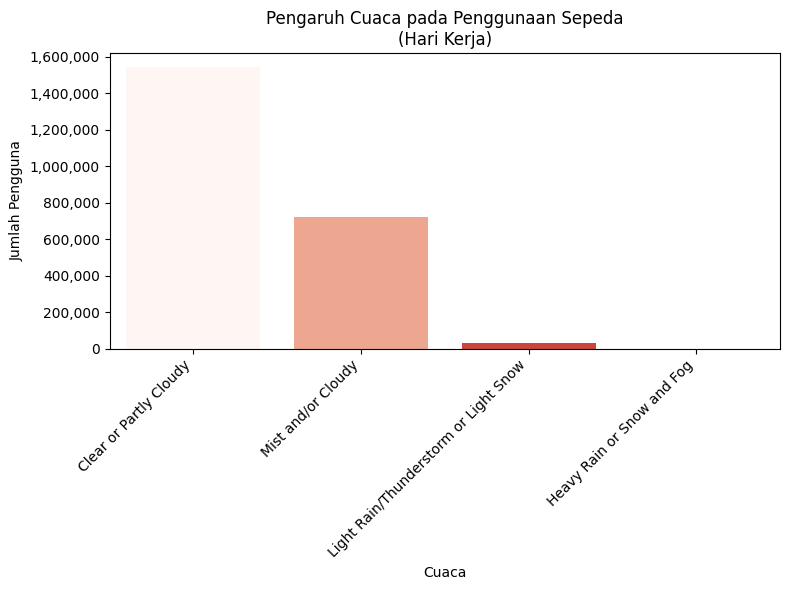

In [55]:
# Data untuk hari kerja
weather_workday_df = day_df[day_df["workingday"] == 1].groupby(["weathersit"]).cnt.sum().reset_index()
if not (weather_workday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_workday_df = pd.concat([weather_workday_df, new_row], ignore_index=True)
weather_workday_df.rename(columns={"weathersit": "weather_index", "cnt": "users_count"}, inplace=True)

# Visualisasi hari kerja
fig, ax = plt.subplots(figsize=(8, 6))
labels_detail = ['Clear or Partly Cloudy', 'Mist and/or Cloudy', 'Light Rain/Thunderstorm or Light Snow', 'Heavy Rain or Snow and Fog']

sns.barplot(x="weather_index", y="users_count", hue="weather_index", data=weather_workday_df, palette="Reds", dodge=False, ax=ax)
ax.set_title("Pengaruh Cuaca pada Penggunaan Sepeda\n(Hari Kerja)")
ax.set_xticks(range(len(labels_detail)))
ax.set_xticklabels(labels_detail, rotation=45, ha="right")
ax.set_xlabel("Cuaca")
ax.set_ylabel("Jumlah Pengguna")

# Mengubah format sumbu Y ke dalam format biasa
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


**Pengaruh Cuaca pada Penggunaan Sepeda di Hari Libur**

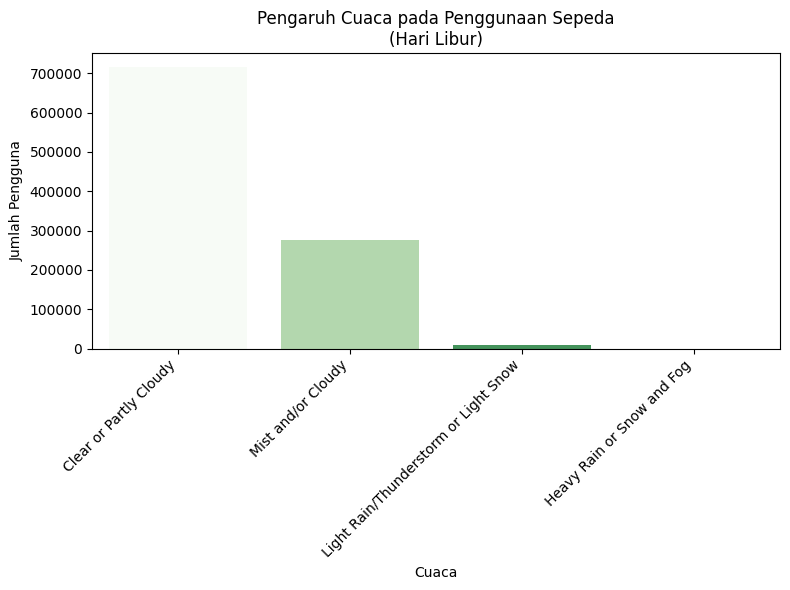

In [56]:
# Data untuk hari libur
weather_holiday_df = day_df[day_df["workingday"] == 0].groupby(["weathersit"]).cnt.sum().reset_index()
if not (weather_holiday_df['weathersit'] == 4).any():
    new_row = pd.DataFrame({"weathersit": [4], "cnt": [0]})
    weather_holiday_df = pd.concat([weather_holiday_df, new_row], ignore_index=True)
weather_holiday_df.rename(columns={"weathersit": "weather_index", "cnt": "users_count"}, inplace=True)

# Visualisasi hari libur
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x="weather_index", y="users_count", hue="weather_index", data=weather_holiday_df, palette="Greens", dodge=False, ax=ax)
ax.set_title("Pengaruh Cuaca pada Penggunaan Sepeda\n(Hari Libur)")
ax.set_xticks(range(len(labels_detail)))
ax.set_xticklabels(labels_detail, rotation=45, ha="right")
ax.set_xlabel("Cuaca")
ax.set_ylabel("Jumlah Pengguna")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


### Kapan waktu penggunaan sepeda paling tinggi sepanjang hari, dan bagaimana pola penggunaan tersebut bervariasi sepanjang minggu?

**Pola Penggunaan Sepeda Sepanjang Minggu dan Jam**

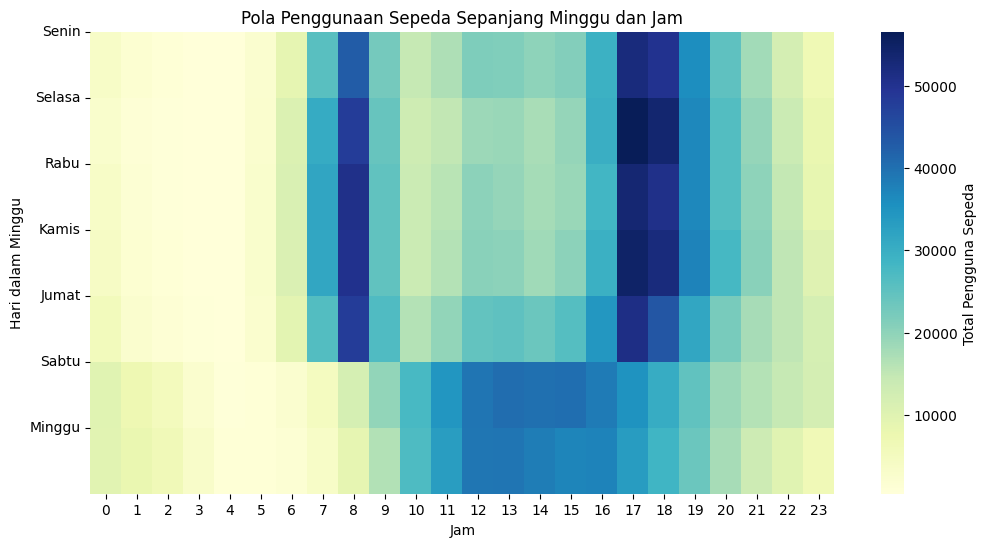

In [48]:
# Menambahkan kolom untuk hari dalam seminggu
hour_df["weekday"] = hour_df["dteday"].dt.dayofweek  # 0 = Senin, ..., 6 = Minggu

# Grupkan data berdasarkan jam dan hari
usage_by_time_df = hour_df.groupby(["weekday", "hr"]).cnt.sum().unstack()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.heatmap(usage_by_time_df, cmap="YlGnBu", cbar_kws={'label': 'Total Pengguna Sepeda'})
plt.title("Pola Penggunaan Sepeda Sepanjang Minggu dan Jam")
plt.xlabel("Jam")
plt.ylabel("Hari dalam Minggu")
plt.yticks(
    ticks=[0, 1, 2, 3, 4, 5, 6],
    labels=["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"],
    rotation=0
)
plt.show()


**Insight:**
- Pada Visualisasi terhadap pertanyaan pertama dapat terlihat bahwa pada masing-masing hari bekerja dan hari libur saling berkaitan dengan adanya faktor cuaca, dengan menggunakan pie chart sebagai patokan bahwa Cuaca pertama yaitu Cuaca cerah/sedikit berawan merupakan faktor utama dimana pengguna menggunakan Bike Sharing. Sedangkan pada cuaca yang ekstrim atau hujan deras tidak ada satupun pengguna yang memakai Bike Sharing di tahun 2011 hingga tahun 2012.
- Pada Visualisasi terhadap pertanyaan kedua dapat terlihat bahwa pada Jam Malam sangatlah banyak pengguna yang menggunakan Bike Sharing dibandingkan dengan jam-jam lainnya terutama pada Dini Hari, visualisasi yang dipakai adalah Bar Chart dimana menggunakan function barplot().

## Analisis Lanjutan (Opsional)

In [60]:
# Mengonversi 'rental_date' menjadi format datetime
day_df['rental_date'] = pd.to_datetime(day_df['rental_date'])

# 1. Hitung Recency (hari sejak rental terakhir)
today = dt.datetime.today()
day_df['recency'] = (today - day_df['rental_date']).dt.days

# 2. Hitung Frequency (jumlah total transaksi yang dilakukan oleh pelanggan)
frequency = day_df.groupby('user_id').size()

# 3. Hitung Monetary (total durasi yang digunakan oleh pelanggan)
monetary = day_df.groupby('user_id')['duration'].sum()

# Menggabungkan semua metrik RFM menjadi satu DataFrame
rfm_df = pd.DataFrame({
    'recency': day_df.groupby('user_id')['recency'].min(),  # Mengambil nilai recency terkecil (terbaru)
    'frequency': frequency,
    'monetary': monetary
})

# Menampilkan DataFrame RFM
print(rfm_df.head())

# 4. Clustering Manual (Manual Grouping)
# Menentukan batasan untuk masing-masing kategori
# Recency: Kategorikan dalam 'Rendah', 'Sedang', 'Tinggi'
# Frequency: Kategorikan dalam 'Rendah', 'Sedang', 'Tinggi'
# Monetary: Kategorikan dalam 'Rendah', 'Sedang', 'Tinggi'

# Recency Grouping (contoh: Recency 0-30: Tinggi, 31-60: Sedang, >60: Rendah)
rfm_df['recency_group'] = pd.cut(rfm_df['recency'], bins=[0, 30, 60, np.inf], labels=['Tinggi', 'Sedang', 'Rendah'])

# Frequency Grouping (contoh: Frequency 1-5: Rendah, 6-10: Sedang, >10: Tinggi)
rfm_df['frequency_group'] = pd.cut(rfm_df['frequency'], bins=[0, 5, 10, np.inf], labels=['Rendah', 'Sedang', 'Tinggi'])

# Monetary Grouping (contoh: Monetary 0-100: Rendah, 101-500: Sedang, >500: Tinggi)
rfm_df['monetary_group'] = pd.cut(rfm_df['monetary'], bins=[0, 100, 500, np.inf], labels=['Rendah', 'Sedang', 'Tinggi'])

# Menampilkan hasil clustering manual
print(rfm_df.head())

# 5. Visualisasi Hasil Clustering
plt.figure(figsize=(10, 6))
plt.scatter(rfm_df['recency'], rfm_df['frequency'], c=rfm_df['recency_group'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Clustering Manual berdasarkan Recency dan Frequency')
plt.xlabel('Recency (Hari Sejak Rental Terakhir)')
plt.ylabel('Frequency (Jumlah Rental)')
plt.colorbar(label='Recency Group')
plt.show()

# Menyimpan hasil clustering ke CSV
rfm_df.to_csv('rfm_clustering_manual_result.csv', index=False)


KeyError: 'rental_date'

## Conclusion

- **Conclution pertanyaan 1:** Jadi dapat disimpulkan bahwa terdapat korelasi diantara faktor cuaca dan total pengguna Bike Sharing baik pada hari kerja maupun hari libur atau tidak bekerja, dikarenakan keduanya saling bersesuaian dan tidak berlawanan. Pie Chart diatas merupakan salah satu faktor pendukung bahwa Faktor Cuaca yang menyebabkan adanya hubungan yang bersesuaian antara Faktor Cuaca di hari bekerja dan Faktor Cuaca di hari libur dengan Total pengguna Bike Sharing. Salah satu faktor pendukung lainnya berada di Eksplorasi Data day_df dimana meskipun total pengguna Bike Sharing di setiap cuaca pada hari bekerja lebih besar dibandingkan dengan total pengguna di setiap cuaca pada hari libur tetapi rata-rata diantara kedua hari tersebut tidak berbeda jauh pada masing-masing cuaca sehingga dapat disimpulkan bahwa semakin cuaca menjadi buruk atau ekstrim maka semakin sedikit total pengguna baik di hari bekerja maupun di hari libur.
- **Conclution pertanyaan 2:** Jadi dapat disimpulkan bahwa terdapat korelasi di tiap kelompok Jam yang dikelompokkan berdasarkan Waktu dan total pengguna, salah satu faktor pendukung bahwa terdapat korelasi atau hubungan antara jumlah pengguna sepeda pada jam-jam tertentu adalah Bar Chart di atas, di mana pada pengguna lebih banyak aktif menggunakan Bike Sharing di malam hari.